# Data processing

In [4]:
import os
from pathlib import Path
import glob
import numpy as np

directory_path = Path('data/Experiment1')

data = []

def generate_data(content):
    X_temp = []
    num_beacons = int(content[0].strip())
    lines_beacons_data = content[1:num_beacons+1]
    for line in lines_beacons_data:
        splitted_data = line.strip().split()
        beacon_cluster = int(splitted_data[0])
        beacon_ray_index = int(splitted_data[1])
        beacon_x_relative = np.double(splitted_data[2])
        beacon_y_relative = np.double(splitted_data[3])
        X_temp.append((beacon_x_relative, beacon_y_relative, beacon_ray_index))
    if num_beacons < 3:
        for _ in range(3 - num_beacons):
            X_temp.append((0, 0, 0))
    splitted_data = content[num_beacons + 1].strip().split()
    global_robot_x = np.double(splitted_data[0])
    global_robot_y = np.double(splitted_data[1])
    silhouette_result = np.double(content[num_beacons + 2])
    Y_temp = [global_robot_x, global_robot_y]
    return X_temp, Y_temp

for root, dirs, files in os.walk(directory_path):
    X_temp = []
    Y_temp = []
    for txt_file in glob.glob(os.path.join(root, '*.txt')):
        with open(txt_file, 'r') as file:
            content = file.readlines()
            X, Y = generate_data(content)
            X_temp.append(X)
            Y_temp.append(Y)
    if len(X_temp) > 0 and len(Y_temp) > 0:
        data.append((np.array(X_temp), np.array(Y_temp)))

data

[(array([[[ 2.85116474e+00, -2.61599886e+00,  2.77000000e+02],
          [ 3.86857014e+00, -2.87758777e-01,  3.53000000e+02],
          [-1.07155346e+00,  4.96419207e-01,  6.78000000e+02]],
  
         [[ 2.67413076e+00, -1.89205537e+00,  2.92000000e+02],
          [ 3.17562000e+00,  6.03610715e-01,  3.84000000e+02],
          [-1.82468303e+00,  3.16889845e-01,  7.05000000e+02]],
  
         [[ 6.16119562e-01, -2.91566454e+00,  2.07000000e+02],
          [ 2.72169416e+00, -1.49459468e+00,  3.05000000e+02],
          [-1.04245316e+00,  1.81588499e+00,  6.04000000e+02]],
  
         [[-5.58027288e-01, -3.05832397e+00,  1.62000000e+02],
          [ 1.97626786e+00, -2.82746529e+00,  2.52000000e+02],
          [ 2.53016757e-01,  1.87681534e+00,  5.29000000e+02]],
  
         [[ 1.87104499e+00, -2.91443706e+00,  2.48000000e+02],
          [-1.96201822e+00,  3.31726817e-01,  7.05000000e+02],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
  
         [[ 1.32416517e+00, -2.9471

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Masking
from keras.utils.vis_utils import plot_model

model = Sequential([
    Masking(mask_value=0., input_shape=(3, 3)),
    GRU(64, return_sequences=True),
    GRU(64),
    Dense(2)  # Output layer: predicting 2 coordinates
])

model.compile(optimizer='adam', loss='mse')

# Generate a plot of the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


ModuleNotFoundError: No module named 'tensorflow.python'

# Learning and Print results

In [ ]:
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model


current_full_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
checkpoints_path = Path(f'checkpoints/{current_full_time}')
if not checkpoints_path.exists():
    checkpoints_path.mkdir(parents=True, exist_ok=True)

last_time = None

test_losses = []
predictions = []
true_values = []
for one_step_data in data:
    X = one_step_data[0]
    Y = one_step_data[1]
    # print(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
    model.fit(X_train, Y_train, epochs=10000, verbose=0)
    
    current_time = datetime.now().strftime("%H-%M-%S")
    last_time = current_time
    model_path = f'{checkpoints_path}/{current_time}.h5'
    model.save(model_path)
    
    loaded_model = load_model(model_path)
    Y_pred = loaded_model.predict(X_test)
    loss = loaded_model.evaluate(X_test, Y_test)
    test_losses.append(loss)
    predictions.append(Y_pred)
    true_values.append(Y_test)
    print("Test Loss:", loss)



Epoch 1/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0882
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0796
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0717
Epoch 4/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0644
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0577
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0516
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0461
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0411
Epoch 9/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0366
Epoch 10/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0326
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0290
Epoch 12/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0258
Epoch 13/1000
1/1 [==================

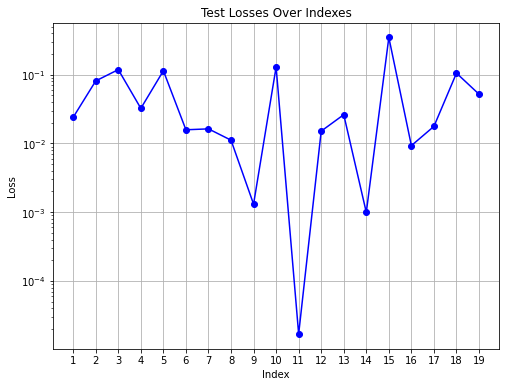

In [ ]:
import matplotlib.pyplot as plt
indexes = range(1, len(test_losses) + 1)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(indexes, test_losses, marker='o', linestyle='-', color='b')
plt.title('Test Losses Over Indexes')
plt.xlabel('Index')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(indexes)  # Set x-ticks to match the indexes
plt.yscale('log')  # Log scale due to the wide range of values
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model(f'{last_time}.h5')
